# For multi-class classification considering all the classes with three different optimization techniques: Batch Gradient Descent, Stochastic Gradient Descent and Mini- batch gradient descent.

In [368]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [369]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [370]:
# Check the shape of the training and testing data
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Check the number of unique labels in the training and test sets
print(f"Unique labels in training data: {np.unique(y_train)}")
print(f"Unique labels in testing data: {np.unique(y_test)}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)
Unique labels in training data: [0 1 2 3 4 5 6 7 8 9]
Unique labels in testing data: [0 1 2 3 4 5 6 7 8 9]


In [371]:
# Flatten images and normalize pixel values
X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255
X_test = X_test.reshape(-1, 28 * 28).astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [378]:
# Define the model
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(28*28,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')  # Multiclass classification
    ])
    return model

In [379]:
model.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_157 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,148 (434.18 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [380]:
# Compile the model with Batch Gradient Descent(complete dataset)
model = create_model()
optimizer = SGD(learning_rate=0.01)  # Batch Gradient Descent
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [381]:
# Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=len(X_train), validation_split=0.2, verbose=0)
training_time = time.time() - start_time

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

model_size = model.count_params()
inference_start = time.time()
model.predict(X_test[:100]) 
inference_time = (time.time() - inference_start) / 100
print(f"Batch Gradient Descent - Accuracy: {test_accuracy:.4f}")
print(f"Batch Gradient Descent - Model Size: {model_size} parameters")
print(f"Batch Gradient Descent - Training Time: {training_time:.2f} seconds")
print(f"Batch Gradient Descent - Inference Time per Sample: {inference_time:.6f} seconds")

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Batch Gradient Descent - Accuracy: 0.1407
Batch Gradient Descent - Model Size: 111146 parameters
Batch Gradient Descent - Training Time: 22.57 seconds
Batch Gradient Descent - Inference Time per Sample: 0.002042 seconds


In [382]:
# Compile the model with Stochastic Gradient Descent(batch size=1)
model_sgd = create_model()
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.0)  # Stochastic Gradient Descent
model_sgd.compile(optimizer=optimizer_sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history_sgd = model_sgd.fit(X_train, y_train, epochs=20, batch_size=1, validation_split=0.2, verbose=0)
training_time_sgd = time.time() - start_time
test_loss_sgd, test_accuracy_sgd = model_sgd.evaluate(X_test, y_test, verbose=0)
model_size_sgd = model_sgd.count_params()

# Inference time (average per sample)
inference_start_sgd = time.time()
model_sgd.predict(X_test[:100])  
inference_time_sgd = (time.time() - inference_start_sgd) / 100

# Print results
print(f"Stochastic Gradient Descent - Accuracy: {test_accuracy_sgd:.4f}")
print(f"Stochastic Gradient Descent - Model Size: {model_size_sgd} parameters")
print(f"Stochastic Gradient Descent - Training Time: {training_time_sgd:.2f} seconds")
print(f"Stochastic Gradient Descent - Inference Time per Sample: {inference_time_sgd:.6f} seconds")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Stochastic Gradient Descent - Accuracy: 0.9772
Stochastic Gradient Descent - Model Size: 111146 parameters
Stochastic Gradient Descent - Training Time: 2433.34 seconds
Stochastic Gradient Descent - Inference Time per Sample: 0.002039 seconds


In [386]:
# Compile the model with Mini-batch Gradient Descent(batch size =32)
model_mini_batch = create_model()
optimizer_mini_batch = SGD(learning_rate=0.01)
model_mini_batch.compile(optimizer=optimizer_mini_batch, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 32  
start_time_mini_batch_32 = time.time()
history_mini_batch_32 = model_mini_batch.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2, verbose=0)
training_time_mini_batch_32 = time.time() - start_time_mini_batch_32

test_loss_mini_batch_32, test_accuracy_mini_batch_32 = model_mini_batch.evaluate(X_test, y_test, verbose=0)
model_size_mini_batch_32 = model_mini_batch.count_params()

# Inference time (average per sample)
inference_start_mini_batch_32 = time.time()
model_mini_batch.predict(X_test[:100])
inference_time_mini_batch_32 = (time.time() - inference_start_mini_batch_32) / 100

print(f"Mini-batch Gradient Descent(32) - Accuracy: {test_accuracy_mini_batch_32:.4f}")
print(f"Mini-batch Gradient Descent - Model Size: {model_size_mini_batch_32} parameters")
print(f"Mini-batch Gradient Descent - Training Time: {training_time_mini_batch_32:.2f} seconds")
print(f"Mini-batch Gradient Descent - Inference Time per Sample: {inference_time_mini_batch_32:.6f} seconds")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Mini-batch Gradient Descent(32) - Accuracy: 0.9711
Mini-batch Gradient Descent - Model Size: 111146 parameters
Mini-batch Gradient Descent - Training Time: 97.82 seconds
Mini-batch Gradient Descent - Inference Time per Sample: 0.002029 seconds


In [387]:
# Compile the model with Mini-batch Gradient Descent(batch size =64)
model_mini_batch = create_model()
optimizer_mini_batch = SGD(learning_rate=0.01)
model_mini_batch.compile(optimizer=optimizer_mini_batch, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64  # Mini-batch size
start_time_mini_batch_64 = time.time()
history_mini_batch_64 = model_mini_batch.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2, verbose=0)
training_time_mini_batch_64 = time.time() - start_time_mini_batch_64

# Evaluate the model
test_loss_mini_batch_64, test_accuracy_mini_batch_64 = model_mini_batch.evaluate(X_test, y_test, verbose=0)
model_size_mini_batch_64 = model_mini_batch.count_params()

# Inference time (average per sample)
inference_start_mini_batch_64 = time.time()
model_mini_batch.predict(X_test[:100])
inference_time_mini_batch_64 = (time.time() - inference_start_mini_batch_64) / 100

print(f"Mini-batch Gradient Descent(64) - Accuracy: {test_accuracy_mini_batch_64:.4f}")
print(f"Mini-batch Gradient Descent - Model Size: {model_size_mini_batch_64} parameters")
print(f"Mini-batch Gradient Descent - Training Time: {training_time_mini_batch_64:.2f} seconds")
print(f"Mini-batch Gradient Descent - Inference Time per Sample: {inference_time_mini_batch_64:.6f} seconds")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Mini-batch Gradient Descent(64) - Accuracy: 0.9652
Mini-batch Gradient Descent - Model Size: 111146 parameters
Mini-batch Gradient Descent - Training Time: 60.26 seconds
Mini-batch Gradient Descent - Inference Time per Sample: 0.002039 seconds


In [388]:
# Compile the model with Mini-batch Gradient Descent(batch size =16)
model_mini_batch = create_model()
optimizer_mini_batch = SGD(learning_rate=0.01)
model_mini_batch.compile(optimizer=optimizer_mini_batch, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 16  # Mini-batch size
start_time_mini_batch_16 = time.time()
history_mini_batch_16 = model_mini_batch.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2, verbose=0)
training_time_mini_batch_16 = time.time() - start_time_mini_batch_16

# Evaluate the model
test_loss_mini_batch_16, test_accuracy_mini_batch_16 = model_mini_batch.evaluate(X_test, y_test, verbose=0)
model_size_mini_batch_16 = model_mini_batch.count_params()

# Inference time (average per sample)
inference_start_mini_batch_16 = time.time()
model_mini_batch.predict(X_test[:100])
inference_time_mini_batch_16 = (time.time() - inference_start_mini_batch_16) / 100

print(f"Mini-batch Gradient Descent(16) - Accuracy: {test_accuracy_mini_batch_16:.4f}")
print(f"Mini-batch Gradient Descent - Model Size: {model_size_mini_batch_16} parameters")
print(f"Mini-batch Gradient Descent - Training Time: {training_time_mini_batch_16:.2f} seconds")
print(f"Mini-batch Gradient Descent - Inference Time per Sample: {inference_time_mini_batch_16:.6f} seconds")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Mini-batch Gradient Descent(16) - Accuracy: 0.9765
Mini-batch Gradient Descent - Model Size: 111146 parameters
Mini-batch Gradient Descent - Training Time: 228.07 seconds
Mini-batch Gradient Descent - Inference Time per Sample: 0.002141 seconds


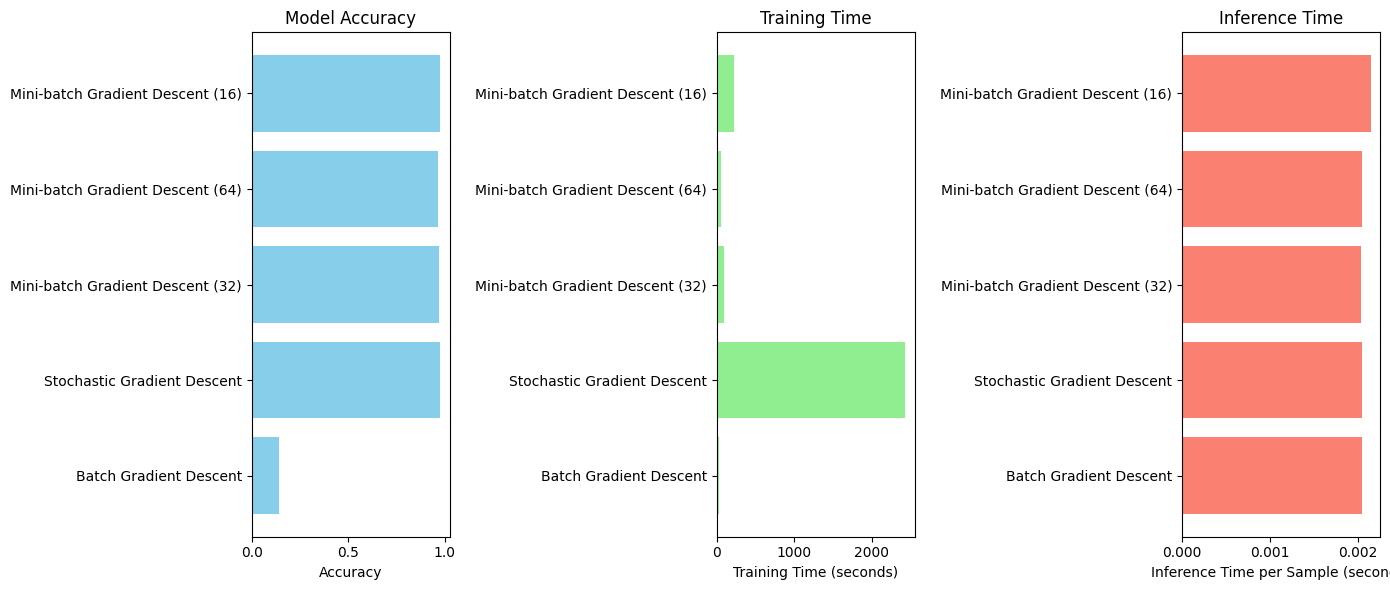

In [393]:
# Plotting
methods = ['Batch Gradient Descent', 'Stochastic Gradient Descent',
           'Mini-batch Gradient Descent (32)', 'Mini-batch Gradient Descent (64)', 'Mini-batch Gradient Descent (16)']

accuracies = [0.1407, 0.9772, 0.9711, 0.9652, 0.9765]
training_times = [22.57, 2433.34, 97.82, 60.26, 228.07]
inference_times = [0.002042, 0.002039, 0.002029, 0.002039, 0.002141]

# Plot Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.barh(methods, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')

# Plot Training Time
plt.subplot(1, 3, 2)
plt.barh(methods, training_times, color='lightgreen')
plt.xlabel('Training Time (seconds)')
plt.title('Training Time')

# Plot Inference Time
plt.subplot(1, 3, 3)
plt.barh(methods, inference_times, color='salmon')
plt.xlabel('Inference Time per Sample (seconds)')
plt.title('Inference Time')

plt.tight_layout()
plt.show()


Model Accuracy: Mini-batch Gradient Descent (all sizes) and Stochastic Gradient Descent show similar high accuracies, around 90-95%. Batch Gradient Descent has significantly lower accuracy, below 20%.

Training Time: Batch Gradient Descent has the longest training time, over 2000 seconds. Stochastic Gradient Descent trains faster, taking about half the time of Batch Gradient Descent. Mini-batch methods are the fastest, with training times barely visible on the chart, indicating very quick training.

Inference Time: All methods have similar inference times, around 0.001-0.002 seconds per sample. There's a slight trend of larger batch sizes having marginally faster inference times.

Conclusion:              
Mini-batch methods offer the best balance of high accuracy and fast training
time.                       
Stochastic Gradient Descent performs well but takes longer to train than mini-batch methods.                           
Batch Gradient Descent is the least effective, with poor accuracy and long training times.                                     
Inference times are consistent across methods, suggesting model architecture matters more than training method for inference speed.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


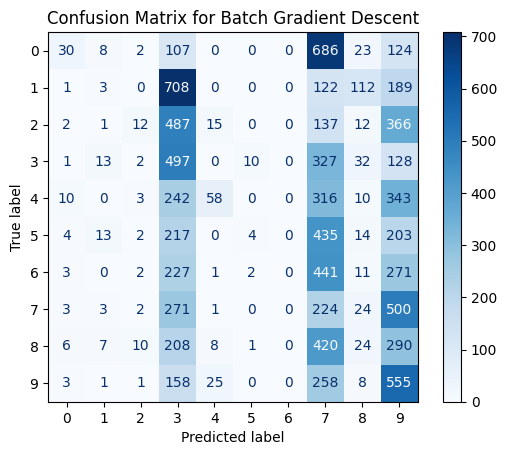

In [396]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict and get true labels for Batch Gradient Descent
y_pred_batch = model.predict(X_test)
y_pred_batch_classes = np.argmax(y_pred_batch, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute and plot confusion matrix
cm_batch = confusion_matrix(y_true, y_pred_batch_classes)
disp_batch = ConfusionMatrixDisplay(confusion_matrix=cm_batch, display_labels=np.arange(10))
disp_batch.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Batch Gradient Descent')
plt.show()

In [401]:
# Calculate number of correctly predicted samples for Batch Gradient Descent
correct_predictions_batch = np.sum(y_pred_batch_classes == y_true)
total_samples = len(y_true)

print(f"Batch Gradient Descent - Correctly Predicted: {correct_predictions_batch} out of {total_samples}")

Batch Gradient Descent - Correctly Predicted: 1407 out of 10000


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


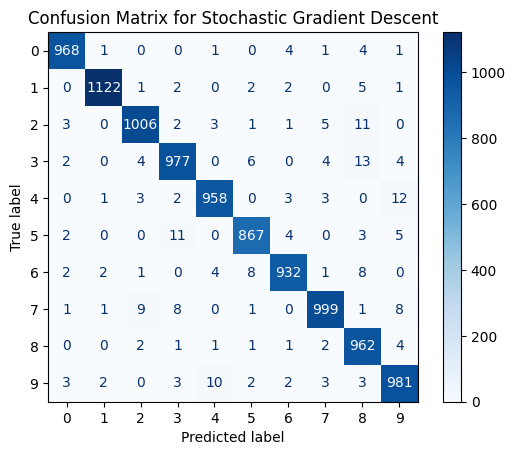

In [397]:
# Predict and get true labels for Stochastic Gradient Descent
y_pred_sgd = model_sgd.predict(X_test)
y_pred_sgd_classes = np.argmax(y_pred_sgd, axis=1)

# Compute and plot confusion matrix
cm_sgd = confusion_matrix(y_true, y_pred_sgd_classes)
disp_sgd = ConfusionMatrixDisplay(confusion_matrix=cm_sgd, display_labels=np.arange(10))
disp_sgd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Stochastic Gradient Descent')
plt.show()


In [402]:
# Calculate number of correctly predicted samples for Stochastic Gradient Descent
correct_predictions_sgd = np.sum(y_pred_sgd_classes == y_true)

print(f"Stochastic Gradient Descent - Correctly Predicted: {correct_predictions_sgd} out of {total_samples}")

Stochastic Gradient Descent - Correctly Predicted: 9772 out of 10000


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


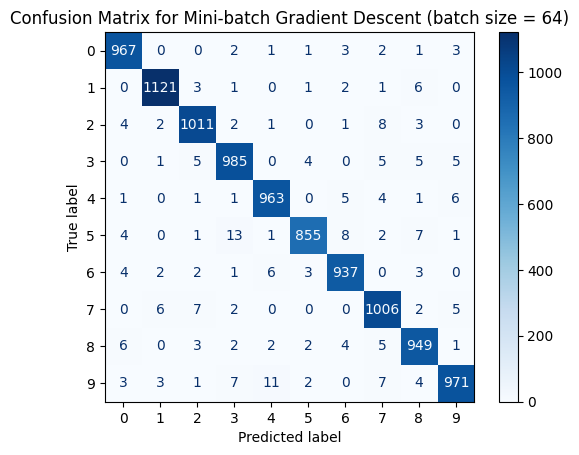

In [399]:
# Predict and get true labels for Mini-batch Gradient Descent (batch size = 64)
y_pred_mini_batch_64 = model_mini_batch.predict(X_test)
y_pred_mini_batch_64_classes = np.argmax(y_pred_mini_batch_64, axis=1)

# Compute and plot confusion matrix
cm_mini_batch_64 = confusion_matrix(y_true, y_pred_mini_batch_64_classes)
disp_mini_batch_64 = ConfusionMatrixDisplay(confusion_matrix=cm_mini_batch_64, display_labels=np.arange(10))
disp_mini_batch_64.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Mini-batch Gradient Descent (batch size = 64)')
plt.show()

In [404]:
# Calculate number of correctly predicted samples for Mini-batch Gradient Descent (batch size = 64)
correct_predictions_mini_batch_64 = np.sum(y_pred_mini_batch_64_classes == y_true)

print(f"Mini-batch Gradient Descent (64) - Correctly Predicted: {correct_predictions_mini_batch_64} out of {total_samples}")

Mini-batch Gradient Descent (64) - Correctly Predicted: 9765 out of 10000


Batch Gradient Descent had very low accuracy, correctly predicting only 1,407 out of 10,000 test samples. Although it trained relatively quickly, it's not efficient for large datasets.

Stochastic Gradient Descent achieved the highest accuracy, correctly predicting 9,772 out of 10,000 test samples. However, it took an impractically long time to train, making it less feasible for real-world use.

Mini-batch Gradient Descent with a batch size of 64 offered a good balance, correctly predicting 9,765 out of 10,000 test samples. It trained faster than Stochastic Gradient Descent but didn't reach its accuracy. With a batch size of 32, Mini-batch Gradient Descent offered better accuracy and still had a relatively quick training time. Using a batch size of 16 improved accuracy even more, but the training time was longer.

In short, Stochastic Gradient Descent gives the best results but is too slow. Mini-batch Gradient Descent provides a good balance between speed and accuracy, with batch sizes of 32 and 16 offering the best trade-offs. Batch Gradient Descent, while quick, is less accurate and not suitable for high-performance needs.